In [1]:
import SinghTools as ST
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
N=int(10e3)

100%|██████████| 10000/10000 [00:01<00:00, 5825.42it/s]


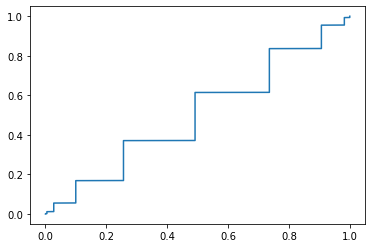

In [2]:
CStruct = lambda x, Samps: sps.beta.cdf(x, sum(Samps) + 0.5, len(Samps) - sum(Samps) + 0.5)
p = 0.4
TargetDist = lambda size: sps.bernoulli.rvs(p, size=[size,10])
plt.plot(ST.Singh(CStruct, TargetDist, p, SSamples = N, TQDM=True), np.linspace(0,1,N))

100%|██████████| 10000/10000 [00:03<00:00, 3213.63it/s]


[[<matplotlib.lines.Line2D at 0x22314d9ac48>],

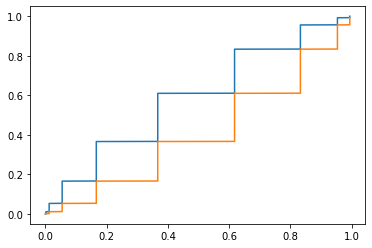

In [3]:
CStruct = lambda x, Samps: [sps.beta.cdf(x, sum(Samps) + 1, len(Samps) - sum(Samps)), sps.beta.cdf(x, sum(Samps), len(Samps) - sum(Samps) + 1)]
p = 0.4
TargetDist = lambda size: sps.bernoulli.rvs(p, size=[size,10])
[ST.Singh(CStruct, TargetDist, p) for S in tqdm(range(0,100))]
[plt.plot(S, np.linspace(0,1,N)) for S in ST.Singh(CStruct, TargetDist, p, SSamples = N, TQDM=True)]

100%|██████████| 10000/10000 [00:03<00:00, 3000.94it/s]


[[<matplotlib.lines.Line2D at 0x22315f15c08>],

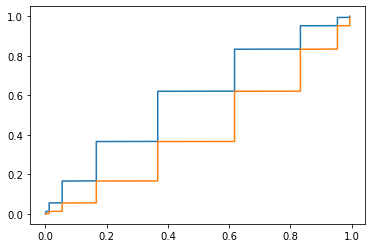

In [4]:
CStruct = lambda x, Samps: [sps.beta.cdf(x, sum(Samps) + 1, len(Samps) - sum(Samps)), sps.beta.cdf(x, sum(Samps), len(Samps) - sum(Samps) + 1)]
p = 0.4
TargetDist = lambda size: sps.bernoulli.rvs(p, size=[size,10])
[ST.SinghFast(CStruct, TargetDist, p) for S in tqdm(range(0,100))]
[plt.plot(S, np.linspace(0,1,N)) for S in ST.Singh(CStruct, TargetDist, p, SSamples = N, TQDM=True)]


In [ ]:
N = 10
sd = 3
mu = 4
CStruct = lambda x, Samples: sps.t.cdf(x, df=len(Samples)-1,loc=np.mean(Samples), scale=np.std(Samples)/(len(Samples)-1)**0.5)
TargetDist = lambda size: sps.norm.rvs(loc = mu, scale = sd, size = size)
a = TargetDist(size=[1000,2])
plt.plot(np.sort([CStruct(4, A) for A in a]),np.linspace(0,1,1000))
plt.plot(ST.Singh(CStruct, TargetDist, mu, 10, TQDM=True), np.linspace(0,1,1000))